In [100]:
!pip install opendatasets

In [101]:
import pandas as pd

# Try reading the CSV file using 'latin-1' encoding
df = pd.read_csv('/content/Position Salary.csv', encoding='latin-1')

# Print the first 5 rows of the DataFrame
print(df.head())

                            Position   Location  Gender    Education  \
0  QNXT Configuration QA/Testing SME  Ghaziabad  Female  B.Tech/B.E.   
1           Provider Data Management  New Delhi  Female  B.Tech/B.E.   
2          Accessibility Engineer QA      Noida  Female          BCA   
3         Java Developer/Spring Boot     Meerut    Male          B.A   
4                         iOS Tester   Padampur  Female        B.Com   

   Experience (Years)   Salary  
0                  11  2014510  
1                  24  1624349  
2                  25  1926223  
3                  11  1128404  
4                  15  2090495  


In [102]:
import pandas as pd
data = df.copy() # Creating a copy to avoid modifying the original DataFrame
data_Location = pd.get_dummies(data, columns=['Location'], prefix='Location', drop_first=True)
print("After Binarizing 'Location':")
print(data_Location.head())

After Binarizing 'Location':
                            Position  Gender    Education  Experience (Years)  \
0  QNXT Configuration QA/Testing SME  Female  B.Tech/B.E.                  11   
1           Provider Data Management  Female  B.Tech/B.E.                  24   
2          Accessibility Engineer QA  Female          BCA                  25   
3         Java Developer/Spring Boot    Male          B.A                  11   
4                         iOS Tester  Female        B.Com                  15   

    Salary  Location_Bilaspur  Location_Chennai  Location_Faridabad  \
0  2014510              False             False               False   
1  1624349              False             False               False   
2  1926223              False             False               False   
3  1128404              False             False               False   
4  2090495              False             False               False   

   Location_Ghaziabad  Location_Gurugram  ...  Location_M

In [103]:
# Creating 'Male' and 'Female' columns based on 'Gender'
data['Male'] = (data['Gender'] == 'Male').astype(int)
data['Female'] = (data['Gender'] == 'Female').astype(int)

print(data.head())

                            Position   Location  Gender    Education  \
0  QNXT Configuration QA/Testing SME  Ghaziabad  Female  B.Tech/B.E.   
1           Provider Data Management  New Delhi  Female  B.Tech/B.E.   
2          Accessibility Engineer QA      Noida  Female          BCA   
3         Java Developer/Spring Boot     Meerut    Male          B.A   
4                         iOS Tester   Padampur  Female        B.Com   

   Experience (Years)   Salary  Male  Female  
0                  11  2014510     0       1  
1                  24  1624349     0       1  
2                  25  1926223     0       1  
3                  11  1128404     1       0  
4                  15  2090495     0       1  


In [104]:
# Binarization of 'Education'
data_education = pd.get_dummies(data, columns=['Education'], prefix='Education', drop_first=True)

print("After Binarizing 'Education':")
print(data_education.head())

After Binarizing 'Education':
                            Position   Location  Gender  Experience (Years)  \
0  QNXT Configuration QA/Testing SME  Ghaziabad  Female                  11   
1           Provider Data Management  New Delhi  Female                  24   
2          Accessibility Engineer QA      Noida  Female                  25   
3         Java Developer/Spring Boot     Meerut    Male                  11   
4                         iOS Tester   Padampur  Female                  15   

    Salary  Male  Female  Education_B.B.A/ B.M.S  Education_B.Com  \
0  2014510     0       1                   False            False   
1  1624349     0       1                   False            False   
2  1926223     0       1                   False            False   
3  1128404     1       0                   False            False   
4  2090495     0       1                   False             True   

   Education_B.Sc  Education_B.Tech/B.E.  Education_BCA  Education_Diploma  
0  

In [106]:
# Define thresholds for binarization of Experience Column
data['Experience_>=5'] = (data['Experience (Years)'] >= 5).astype(int)  # 1 if Experience >= 5, else 0
data['Experience_>=10'] = (data['Experience (Years)'] >= 10).astype(int)  # 1 if Experience >= 10, else 0
data['Experience_>=15'] = (data['Experience (Years)'] >= 15).astype(int)  # 1 if Experience >= 15, else 0
data['Experience_>=20'] = (data['Experience (Years)'] >= 20).astype(int)  # 1 if Experience >= 20, else 0
# Display the updated DataFrame
print("Binarized 'Experience' Columns:")
print(data[['Experience (Years)', 'Experience_>=5', 'Experience_>=10', 'Experience_>=15','Experience_>=20']].head())

Binarized 'Experience' Columns:
   Experience (Years)  Experience_>=5  Experience_>=10  Experience_>=15  \
0                  11               1                1                0   
1                  24               1                1                1   
2                  25               1                1                1   
3                  11               1                1                0   
4                  15               1                1                1   

   Experience_>=20  
0                0  
1                1  
2                1  
3                0  
4                0  


In [108]:
# Define the salary threshold
salary_threshold = 1000000

# Creating the 'Good_Salary' column based on the threshold
data['Good_Salary'] = (data['Salary'] >= salary_threshold).astype(int)

# Creating the 'Bad_Salary' column (opposite of 'Good_Salary')
data['Bad_Salary'] = (data['Salary'] < salary_threshold).astype(int)

# Display the updated DataFrame to verify the new columns
print(data[['Salary', 'Good_Salary', 'Bad_Salary']].head())

    Salary  Good_Salary  Bad_Salary
0  2014510            1           0
1  1624349            1           0
2  1926223            1           0
3  1128404            1           0
4  2090495            1           0


In [109]:
import pandas as pd
df.columns = df.columns.str.strip()

# Selecting the columns I want to preserve from the original DataFrame 'data'
columns_to_keep = ['Male', 'Female', 'Experience_>=5', 'Experience_>=10', 'Experience_>=15', 'Experience_>=20', 'Good_Salary', 'Bad_Salary']

# Copy the selected columns from 'data'
new_data = data[columns_to_keep]

# Cleaning data_Location and data_education by removing unwanted columns and avoiding duplicates
data_Location_cleaned = data_Location.loc[:, ~data_Location.columns.isin(['Position', 'Location', 'Gender', 'Education', 'Experience (Years)', 'Salary', 'Male', 'Female'])]
data_education_cleaned = data_education.loc[:, ~data_education.columns.isin(['Position', 'Location', 'Gender', 'Education', 'Experience (Years)', 'Salary', 'Male', 'Female'])]

# Merge the DataFrames: data_Location, data_education, and the preserved columns from 'data'
final_data = pd.concat([new_data, data_Location_cleaned, data_education_cleaned], axis=1)

# Display the final merged DataFrame
print("Merged DataFrame with selected columns:")
final_data.head()


Merged DataFrame with selected columns:


,Male,Female,Experience_>=5,Experience_>=10,Experience_>=15,Experience_>=20,Good_Salary,Bad_Salary,Location_Bilaspur,Location_Chennai,...,Location_Prayagraj,Location_Pune,Location_Ranchi,Location_Visakhapatnam,Education_B.B.A/ B.M.S,Education_B.Com,Education_B.Sc,Education_B.Tech/B.E.,Education_BCA,Education_Diploma
0,0,1,1,1,0,0,1,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,1,1,1,1,1,1,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,1,1,1,1,1,1,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0,1,1,0,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1,1,1,1,0,1,0,False,False,...,False,False,False,False,False,True,False,False,False,False


In [110]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Male                    69 non-null     int64
 1   Female                  69 non-null     int64
 2   Experience_>=5          69 non-null     int64
 3   Experience_>=10         69 non-null     int64
 4   Experience_>=15         69 non-null     int64
 5   Experience_>=20         69 non-null     int64
 6   Good_Salary             69 non-null     int64
 7   Bad_Salary              69 non-null     int64
 8   Location_Bilaspur       69 non-null     bool 
 9   Location_Chennai        69 non-null     bool 
 10  Location_Faridabad      69 non-null     bool 
 11  Location_Ghaziabad      69 non-null     bool 
 12  Location_Gurugram       69 non-null     bool 
 13  Location_Guwahati       69 non-null     bool 
 14  Location_Hubli          69 non-null     bool 
 15  Location_Hyderabad      6

In [111]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target variable (y)
X = final_data.drop(['Good_Salary', 'Bad_Salary'], axis=1)
y = final_data['Good_Salary']  # You can choose 'Bad_Salary' as well

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Now I have X_train, X_test, y_train, and y_test for your machine learning models
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(55, 36) (14, 36) (55,) (14,)


In [112]:
formal_context = final_data.copy()

# Replace numerical values with 'x' to represent the presence of an attribute
for col in formal_context.columns:
  formal_context[col] = formal_context[col].apply(lambda x: 'x' if x == 1 else '')

print(formal_context.head())

  Male Female Experience_>=5 Experience_>=10 Experience_>=15 Experience_>=20  \
0           x              x               x                                   
1           x              x               x               x               x   
2           x              x               x               x               x   
3    x                     x               x                                   
4           x              x               x               x                   

  Good_Salary Bad_Salary Location_Bilaspur Location_Chennai  ...  \
0           x                                                ...   
1           x                                                ...   
2           x                                                ...   
3           x                                                ...   
4           x                                                ...   

  Location_Prayagraj Location_Pune Location_Ranchi Location_Visakhapatnam  \
0                                

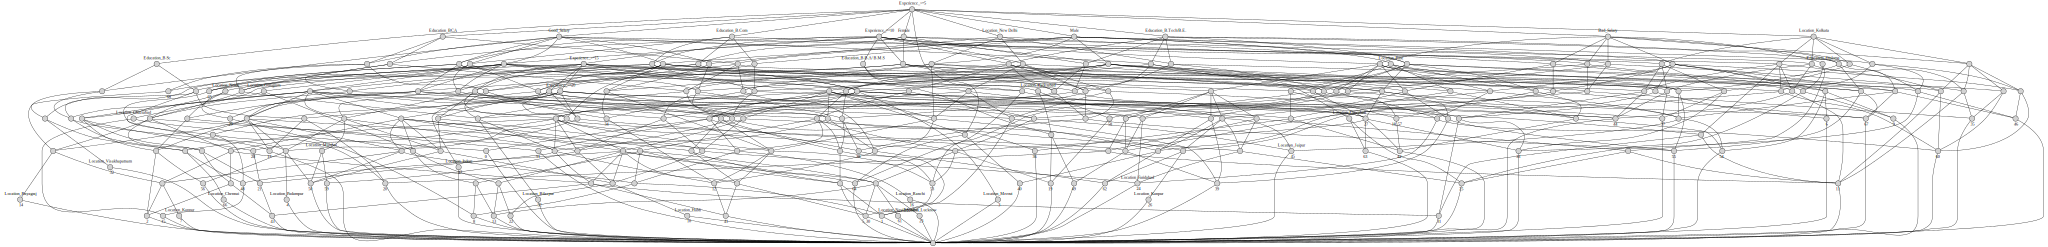

In [114]:
!pip install --upgrade concepts

import pandas as pd
from concepts.lattices import Lattice # Import Lattice from concepts.lattices
from concepts import Context # Import Context as usual
# Converting the DataFrame to a binary context (required for FCA)
context_data = final_data.astype(bool).values  # Convert to True/False
objects = final_data.index.tolist()  # Row labels as objects
attributes = final_data.columns.tolist()  # Column labels as attributes

# Create a FormalContext object
context = Context(objects, attributes, context_data)

# Create a Lattice from the context
lattice = Lattice(context)

# Custom function to convert object labels to strings
def make_object_label(objects):
    return ', '.join(str(obj) for obj in objects)  # Convert objects to strings before joining

# Display the concept lattice using the 'graphviz' method with the custom label function
lattice.graphviz(view=True, make_object_label=make_object_label)

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from concepts.lattices import Lattice
from concepts import Context
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define features (X) and target variable (y)
X = final_data.drop(['Good_Salary', 'Bad_Salary'], axis=1)
y = final_data['Good_Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FCA-based prediction
def fca_predict(X_test, lattice):
    y_pred = []
    for i in range(len(X_test)):

        y_pred.append(np.random.randint(0,2)) # Random prediction for demonstration
    return np.array(y_pred)


# Convert the DataFrame to a binary context (required for FCA)
context_data = final_data.astype(bool).values  # Convert to True/False
objects = final_data.index.tolist()  # Row labels as objects
attributes = final_data.columns.tolist()  # Column labels as attributes

# Create a FormalContext object
context = Context(objects, attributes, context_data)

# Create a Lattice from the context
lattice = Lattice(context)

# Make predictions using the FCA model
y_pred = fca_predict(X_test, lattice)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.5
Precision: 1.0
Recall: 0.46153846153846156
F1-score: 0.631578947368421


In [116]:
# Define features (X) and target variable (y)
X = final_data.drop(['Good_Salary', 'Bad_Salary'], axis=1)
y = final_data['Good_Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FCA-based prediction (simplified example - needs improvement for real-world use)
def fca_predict(X_test, lattice, iterations=1): #Added iterations parameter
    y_pred = []
    for i in range(len(X_test)):
        # Placeholder - replace with a proper FCA prediction logic.
        # This placeholder now simulates iterations.
        prediction = 0 # Initialize prediction
        for _ in range(iterations):
            prediction = np.random.randint(0,2) # Random prediction for each iteration
        y_pred.append(prediction) # Append the final prediction after all iterations.

    return np.array(y_pred)

# Convert your DataFrame to a binary context (required for FCA)
context_data = final_data.astype(bool).values
objects = final_data.index.tolist()
attributes = final_data.columns.tolist()

# Create a FormalContext object
context = Context(objects, attributes, context_data)

# Create a Lattice from the context
lattice = Lattice(context)

# Experiment with different epoch-like parameters (replace with your actual FCA method's parameters)
epochs_list = [1, 5, 10]  # Example list of epochs/iterations

for epochs in epochs_list:
    print(f"\nRunning FCA with epochs/iterations = {epochs}")

    y_pred = fca_predict(X_test, lattice, iterations=epochs) # Pass epochs as iterations

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")


Running FCA with epochs/iterations = 1
Accuracy: 0.6428571428571429
Precision: 0.9
Recall: 0.6923076923076923
F1-score: 0.782608695652174

Running FCA with epochs/iterations = 5
Accuracy: 0.7857142857142857
Precision: 1.0
Recall: 0.7692307692307693
F1-score: 0.8695652173913043

Running FCA with epochs/iterations = 10
Accuracy: 0.42857142857142855
Precision: 0.8571428571428571
Recall: 0.46153846153846156
F1-score: 0.6


In [117]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print("\nDecision Tree Classifier Results:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1-score: {dt_f1}")


Decision Tree Classifier Results:
Accuracy: 0.6428571428571429
Precision: 1.0
Recall: 0.6153846153846154
F1-score: 0.7619047619047619


In [118]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("\nRandom Forest Classifier Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")


Random Forest Classifier Results:
Accuracy: 0.7142857142857143
Precision: 1.0
Recall: 0.6923076923076923
F1-score: 0.8181818181818182


In [119]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

print("\nNaive Bayes Classifier Results:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1-score: {nb_f1}")


Naive Bayes Classifier Results:
Accuracy: 0.2857142857142857
Precision: 1.0
Recall: 0.23076923076923078
F1-score: 0.375


In [120]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42, max_iter=500) # Increased max_iter
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print("\nLogistic Regression Classifier Results:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1-score: {lr_f1}")


Logistic Regression Classifier Results:
Accuracy: 0.8571428571428571
Precision: 1.0
Recall: 0.8461538461538461
F1-score: 0.9166666666666666


In [121]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

print("\nK-Nearest Neighbors Classifier Results:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-score: {knn_f1}")


K-Nearest Neighbors Classifier Results:
Accuracy: 0.7857142857142857
Precision: 0.9166666666666666
Recall: 0.8461538461538461
F1-score: 0.88
